# Demonstration of added utility depending on time to IVT and MT

In this notebook we examine the relationship between time to treatment and the effect of treatment.

Outcome results are calculated for three patients groups:

1. nLVO receiving IVT
2. LVO receiving IVT only
3. LVO receiving MT (data based on trails where 85% had also received IVT)

When we look at combined effect of these groups, we make some basic assumptions (which are used as being 'reasonable' rather than 'definitive'):

* 20% of all ischaemic stroke admissions receive IVT and/or MT.
* 35% of our treated population have LVO.
* 28.6% of LVO receive MT (this gives 10% of all ischaemic strokes receiving MT)
* 85% of LVO receiving MT have received IVT (from clinical trials  data); for those 85% if the benefit of IVT exceed the benefit of MT (e.g. very early IVT, and very late MT), then the benefit is based on IVT.
* 15.5% nLVO receive thrombolysis (this brings total IVT to 20% use).


## Load packages

In [37]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  # for axis tick locations

import numpy as np
import pandas as pd
import copy

from stroke_outcome.continuous_outcome import Continuous_outcome

import warnings
warnings.filterwarnings("ignore")

## Set up model

In [38]:
# Set up outcome model
outcome_model = Continuous_outcome()

## Individual treatment effects

Here we consider the impact, and effect of time to treatment, for three cohorts independently:

1. nLVO receiving IVT
2. LVO receiving IVT only
3. LVO receiving MT (data based on trails where 85% had also received IVT)

Set up shared treatment times:

In [39]:
max_time_to_ivt = 6.3 * 60  # minutes
max_time_to_mt = 8.0 * 60  # minutes

In [40]:
n_patients = 21
treatment_times_ivt = np.linspace(0.0, max_time_to_ivt, n_patients)
treatment_times_mt = np.linspace(0.0, max_time_to_mt, n_patients)

Create a dataframe for each cohort:

In [41]:
df_patients_nlvo_ivt = pd.DataFrame()
df_patients_nlvo_ivt['onset_to_needle_mins'] = treatment_times_ivt
df_patients_nlvo_ivt['onset_to_puncture_mins'] = treatment_times_ivt
df_patients_nlvo_ivt['stroke_type_code'] = 1
df_patients_nlvo_ivt['ivt_chosen_bool'] = 1
df_patients_nlvo_ivt['mt_chosen_bool'] = 0
df_patients_nlvo_ivt['label'] = 'nlvo_ivt'

In [42]:
df_patients_lvo_ivt = pd.DataFrame()
df_patients_lvo_ivt['onset_to_needle_mins'] = treatment_times_ivt
df_patients_lvo_ivt['onset_to_puncture_mins'] = treatment_times_ivt
df_patients_lvo_ivt['stroke_type_code'] = 2
df_patients_lvo_ivt['ivt_chosen_bool'] = 1
df_patients_lvo_ivt['mt_chosen_bool'] = 0
df_patients_lvo_ivt['label'] = 'lvo_ivt'

In [43]:
df_patients_lvo_mt = pd.DataFrame()
df_patients_lvo_mt['onset_to_needle_mins'] = treatment_times_mt
df_patients_lvo_mt['onset_to_puncture_mins'] = treatment_times_mt
df_patients_lvo_mt['stroke_type_code'] = 2
df_patients_lvo_mt['ivt_chosen_bool'] = 1
df_patients_lvo_mt['mt_chosen_bool'] = 1
df_patients_lvo_mt['label'] = 'lvo_mt'

Combine the groups into one dataframe:

In [44]:
df_patients = pd.concat(
    (df_patients_nlvo_ivt, df_patients_lvo_ivt, df_patients_lvo_mt),
    ignore_index=True
)

In [45]:
df_patients

,onset_to_needle_mins,onset_to_puncture_mins,stroke_type_code,ivt_chosen_bool,mt_chosen_bool,label
0,0.0,0.0,1,1,0,nlvo_ivt
1,18.9,18.9,1,1,0,nlvo_ivt
2,37.8,37.8,1,1,0,nlvo_ivt
3,56.7,56.7,1,1,0,nlvo_ivt
4,75.6,75.6,1,1,0,nlvo_ivt
...,...,...,...,...,...,...
58,384.0,384.0,2,1,1,lvo_mt
59,408.0,408.0,2,1,1,lvo_mt
60,432.0,432.0,2,1,1,lvo_mt
61,456.0,456.0,2,1,1,lvo_mt


Calculate outcomes:

In [46]:
outcome_model.assign_patients_to_trial(df_patients)

In [47]:
# Calculate outcomes:
patient_data_dict, outcomes_by_stroke_type, full_cohort_outcomes = (
    outcome_model.calculate_outcomes())

# Make a copy of the results:
outcomes_by_stroke_type = copy.copy(outcomes_by_stroke_type)
full_cohort_outcomes = copy.copy(full_cohort_outcomes)

Place the relevant results into the starting dataframe:

In [48]:
df_patients['added_utility'] = full_cohort_outcomes['each_patient_utility_shift']
df_patients['mean_mrs'] = full_cohort_outcomes['each_patient_mrs_post_stroke']
df_patients['mrs_less_equal_2'] = full_cohort_outcomes['each_patient_mrs_dist_post_stroke'][:, 2]

In [49]:
df_patients

,onset_to_needle_mins,onset_to_puncture_mins,stroke_type_code,ivt_chosen_bool,mt_chosen_bool,label,added_utility,mean_mrs,mrs_less_equal_2
0,0.0,0.0,1,1,0,nlvo_ivt,0.158130,1.391000,0.752000
1,18.9,18.9,1,1,0,nlvo_ivt,0.151213,1.432844,0.744359
2,37.8,37.8,1,1,0,nlvo_ivt,0.144153,1.475256,0.736566
3,56.7,56.7,1,1,0,nlvo_ivt,0.136951,1.518219,0.728622
4,75.6,75.6,1,1,0,nlvo_ivt,0.129607,1.561715,0.720528
...,...,...,...,...,...,...,...,...,...
58,384.0,384.0,2,1,1,lvo_mt,0.038204,3.470366,0.305938
59,408.0,408.0,2,1,1,lvo_mt,0.025056,3.537691,0.292678
60,432.0,432.0,2,1,1,lvo_mt,0.012103,3.603895,0.279761
61,456.0,456.0,2,1,1,lvo_mt,-0.000646,3.668993,0.267198


### Plot outcomes with time

Setup for plot:

In [50]:
# First three colours of seaborn colourblind:
colours = ['#0072B2', '#009E73', '#D55E00'] 
linestyles = ['-', '--', '-.']

# Set up axis conversion between minutes and hours:
use_hours=True
if use_hours:
    unit_str = 'hours'
    x_times_scale = (1.0 / 60.0)
    xtick_max = (max_time_to_mt+1)/60.0
    major_step = 1
    minor_step = (15.0/60.0) # 15 minutes
else:
    unit_str = 'minutes'
    x_times_scale = 1.0
    xtick_max = max_time_to_mt+1
    major_step = 60.0
    minor_step = 10.0

# Data setup:
# The order of the keys in these dictionaries
# sets up which outcome goes in which axis, and
# which cohort uses each colour and linestyle.
# The value for each key is the prettier label to be displayed.
outcome_labels = {
    'mean_mrs': 'Mean mRS',
    'mrs_less_equal_2': r'Proportion with mRS$\leq$2',
    'added_utility': 'Added utility',
}
cohort_labels = {
    'nlvo_ivt': 'nLVO: IVT',
    'lvo_ivt': 'LVO: IVT',
    'lvo_mt': 'LVO: MT',
}

Plotting:

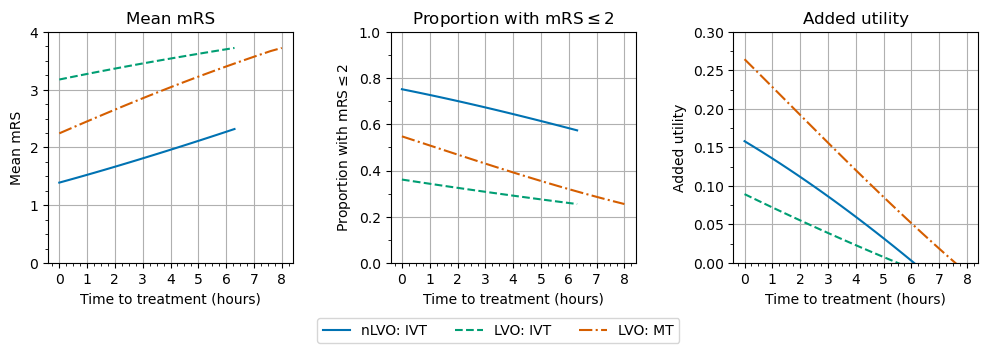

In [51]:
# Plot
fig, axs = plt.subplots(1, 3, figsize=(12,3), gridspec_kw={'wspace':0.4})
ax1 = axs[0]
ax2 = axs[1]
ax3 = axs[2]

for i, outcome_label in enumerate(outcome_labels.keys()):
    for j, cohort_label in enumerate(cohort_labels.keys()):
        data_here = df_patients[df_patients['label'] == cohort_label]
        # In this case, onset-to-needle and onset-to-puncture columns
        # have identical contents so just use the IVT one each time.
        axs[i].plot(
            data_here['onset_to_needle_mins'] * x_times_scale,
            data_here[outcome_label],
            label=cohort_labels[cohort_label],
            color=colours[j],
            linestyle=linestyles[j],
        )
    if i == 0:
        # Draw legend now to avoid repeating labels:
        fig.legend(bbox_to_anchor=[0.5,-0.05], loc='upper center', ncol=3)

# Axis setup:
for i, label in enumerate(outcome_labels.values()):
    axs[i].set_ylabel(label)
    axs[i].set_title(label)

# Mean mRS
ax1.set_ylim(0, 4)
ax1.set_yticks(np.arange(0, 4.1, 1))
ax1.set_yticks(np.arange(0, 4.1, 0.25), minor=True)

# mRS <= 2
ax2.set_ylim(0, 1)
ax2.set_yticks(np.arange(0, 1.01, 0.2))
ax2.set_yticks(np.arange(0, 1.01, 0.1), minor=True)

# Added utility
ax3.set_ylim(0)
ax3.set_yticks(np.arange(0, 0.31, 0.05))
ax3.set_yticks(np.arange(0, 0.31, 0.025), minor=True)

for ax in axs:
    ax.set_xlabel('Time to treatment ('+unit_str+')')
    ax.xaxis.set_major_locator(ticker.MultipleLocator(major_step))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(minor_step))
    ax.grid()

# plt.tight_layout(pad=2)
plt.savefig('./images/time_to_treatment.jpg', dpi=300, bbox_inches='tight')

plt.show()

## Create a grid of treatment times

Use these treatment times:

In [16]:
time_to_ivt = np.arange(0, max_time_to_ivt + 1, 10)
time_to_mt = np.arange(0, max_time_to_mt + 1, 10)

Mesh the two sets of times to get a grid of every combination of times in the two lists:

In [17]:
times_to_ivt_grid, times_to_mt_grid = np.meshgrid(time_to_ivt, time_to_mt)

Flatten the grids back into a column of data and store in this DataFrame:

In [20]:
df_patients_grid = pd.DataFrame()
df_patients_grid['onset_to_needle_mins'] = times_to_ivt_grid.flatten()
df_patients_grid['onset_to_puncture_mins'] = times_to_mt_grid.flatten()

### Set up separate grids for each cohort

Each cohort uses the same grid of treatment times with different stroke and treatment types:

In [21]:
df_patients_grid_nlvo_ivt = df_patients_grid.copy()
df_patients_grid_nlvo_ivt['stroke_type_code'] = 1
df_patients_grid_nlvo_ivt['ivt_chosen_bool'] = 1
df_patients_grid_nlvo_ivt['mt_chosen_bool'] = 0
df_patients_grid_nlvo_ivt['label'] = 'nlvo_ivt'

In [22]:
df_patients_grid_lvo_ivt = df_patients_grid.copy()
df_patients_grid_lvo_ivt['stroke_type_code'] = 2
df_patients_grid_lvo_ivt['ivt_chosen_bool'] = 1
df_patients_grid_lvo_ivt['mt_chosen_bool'] = 0
df_patients_grid_lvo_ivt['label'] = 'lvo_ivt'

In [23]:
df_patients_grid_lvo_mt = df_patients_grid.copy()
df_patients_grid_lvo_mt['stroke_type_code'] = 2
df_patients_grid_lvo_mt['ivt_chosen_bool'] = 1
df_patients_grid_lvo_mt['mt_chosen_bool'] = 1
df_patients_grid_lvo_mt['label'] = 'lvo_mt'

### Calculate outcomes for each cohort

In [24]:
dfs = [df_patients_grid_nlvo_ivt, df_patients_grid_lvo_ivt, df_patients_grid_lvo_mt]

for df in dfs:
    outcome_model.assign_patients_to_trial(df)
    
    # Calculate outcomes:
    patient_data_dict, outcomes_by_stroke_type, full_cohort_outcomes = (
        outcome_model.calculate_outcomes())
    
    # Make a copy of the results:
    outcomes_by_stroke_type = copy.copy(outcomes_by_stroke_type)
    full_cohort_outcomes = copy.copy(full_cohort_outcomes)
    
    # Place the relevant results into the starting dataframe:
    df['added_utility'] = full_cohort_outcomes['each_patient_utility_shift']
    df['mean_mrs'] = full_cohort_outcomes['each_patient_mrs_post_stroke']
    df['mrs_less_equal_2'] = full_cohort_outcomes['each_patient_mrs_dist_post_stroke'][:, 2]
    df['mrs_shift'] = full_cohort_outcomes['each_patient_mrs_shift']

### Plot outcomes for each cohort

Take the columns of data, reshape them into grids, and display the grids with a colour scale.

Setup for plots:

In [25]:
# Instead of the axes showing the row, column numbers of the grid,
# use this extent to scale the row, column numbers to the times.
# Extra division by 60 for conversion to hours.
grid_extent = np.array([
    min(time_to_ivt), max(time_to_ivt),  # x-limits
    min(time_to_mt), max(time_to_mt)     # y-limits
]) / 60.0

# Data setup:
# The order of the keys in these dictionaries
# sets up which outcome goes in which axis, and
# which cohort uses each colour and linestyle.
# The value for each key is the prettier label to be displayed.
outcome_labels = {
    'added_utility': 'Added utility',
    'mrs_shift': 'Mean change in mRS',
}
cohort_labels = {
    'nlvo_ivt': 'nLVO treated with IVT',
    'lvo_ivt': 'LVO treated with IVT',
    'lvo_mt': 'LVO treated with MT',
}

# Data sources:
dfs = {
    'nlvo_ivt': df_patients_grid_nlvo_ivt,
    'lvo_ivt': df_patients_grid_lvo_ivt,
    'lvo_mt': df_patients_grid_lvo_mt,
}

# Colour setup.
cmaps = ['plasma', 'viridis_r']
# Pick out shared colour scale limits:
vlims = {
    'added_utility': [
        min([df['added_utility'].min() for df in dfs.values()]),
        max([df['added_utility'].max() for df in dfs.values()]),
    ],
    'mrs_shift': [
        min([df['mrs_shift'].min() for df in dfs.values()]),
        max([df['mrs_shift'].max() for df in dfs.values()]),
    ],
}
# Shared contour levels:
levels = {
    'added_utility': np.arange(0.00, 0.25 + 0.01, 0.05),
    'mrs_shift': np.arange(-1.2, 0.0 + 0.01, 0.2),
}

Plotting:

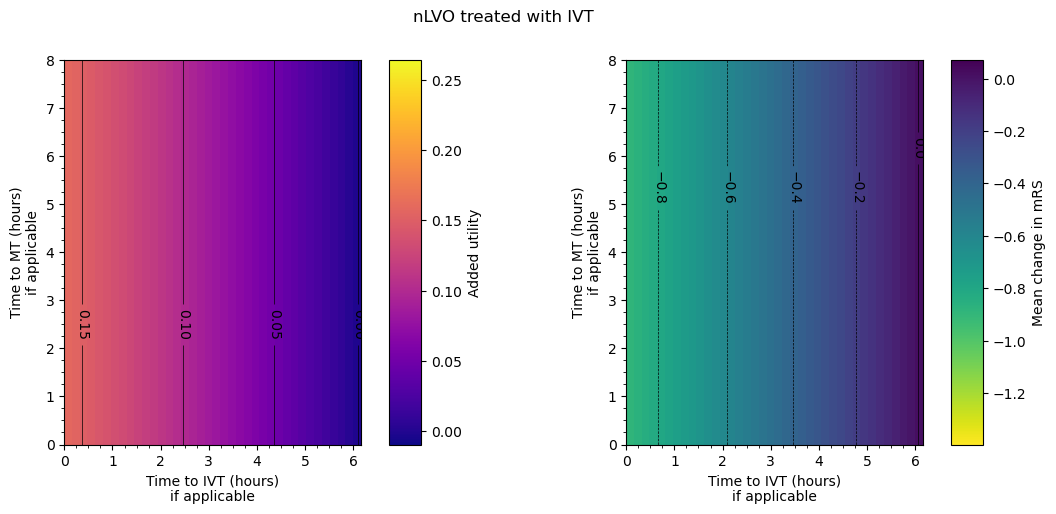

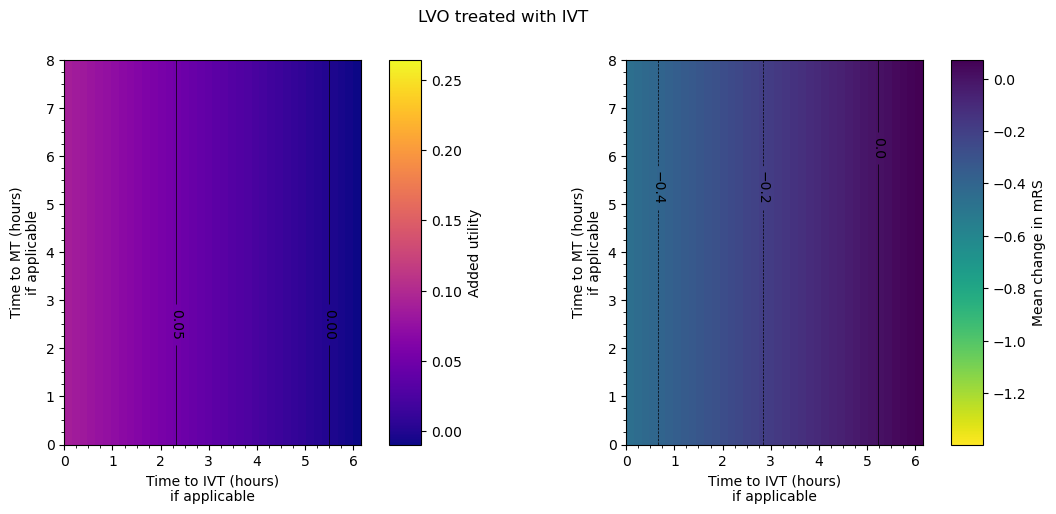

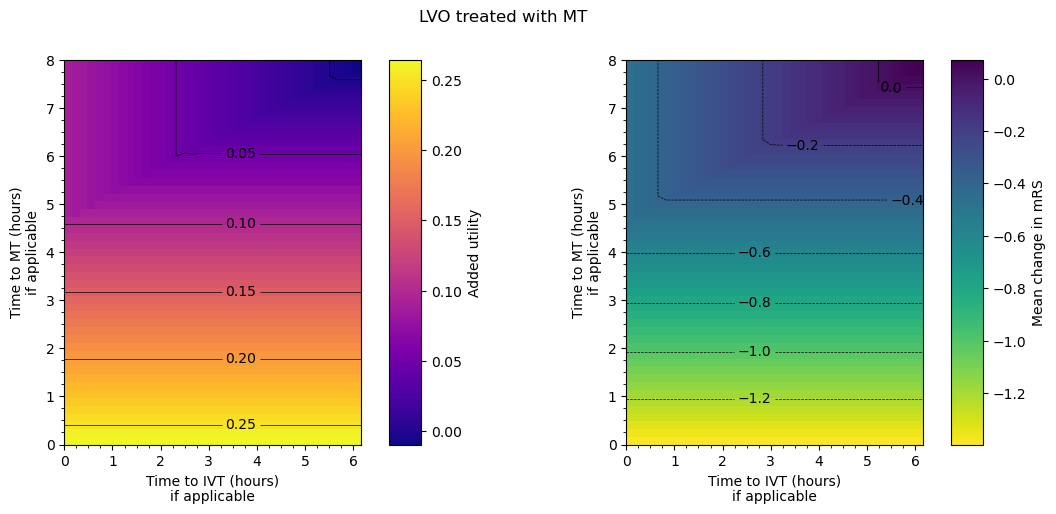

In [26]:
for j, cohort_label in enumerate(cohort_labels.keys()):
    # Make an extra empty subplot in the middle for spacing:
    fig, axs = plt.subplots(
        1, 5, figsize=(12, 5),
        gridspec_kw={'width_ratios': [10, 1, 5, 10, 1], 'wspace': 0.1}
    )
    
    for i, outcome_label in enumerate(outcome_labels.keys()):
        # Pick out which axes to plot the grid and the colour bar on:
        ax = axs[3*i]
        cax = axs[3*i +1]

        # Pick out the data for the grid.
        df = dfs[cohort_label][outcome_label]
        # Turn the column of data into a grid:
        outcome_data = df.values.reshape(len(time_to_mt), len(time_to_ivt))

        
        img1 = ax.contour(
            outcome_data,
            colors='k',
            linewidths=0.5,
            vmin=vlims[outcome_label][0],
            vmax=vlims[outcome_label][1],
            extent=grid_extent,
            # aspect=aspect,
            levels=levels[outcome_label]
        )
        
        ax.clabel(img1, inline=True, fontsize=10)
        
        # Plotting:
        c = ax.imshow(
            outcome_data, origin='lower', extent=grid_extent, cmap=cmaps[i],
            vmin=vlims[outcome_label][0], vmax=vlims[outcome_label][1],
        )
        plt.colorbar(c, cax=cax, label=outcome_labels[outcome_label])
    
    for ax in axs[[0, 3]]:
        ax.set_xlabel('Time to IVT (hours)\nif applicable')
        ax.set_ylabel('Time to MT (hours)\nif applicable')
        ax.xaxis.set_major_locator(ticker.MultipleLocator(major_step))
        ax.xaxis.set_minor_locator(ticker.MultipleLocator(minor_step))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(major_step))
        ax.yaxis.set_minor_locator(ticker.MultipleLocator(minor_step))
        
    fig.suptitle(cohort_labels[cohort_label])
    # Make the extra empty subplot invisible:
    axs[2].axis('off')
    
    plt.show()

## Combining patient groups

Here we examined the combined effect of IVT and MT on outcomes across nLVO and LVO ischaemic strokes.

In this example, we make some basic assumptions:

* 20% of all stroke admissions receive IVT and/or MT.
* 35% of our treated population have LVO.
* 28.6% of LVO receive MT (this gives 10% of all ischaemic strokes receiving MT)
* 85% of LVO receiving MT have received IVT (from clinical trials  data); for those 85% if the benefit of IVT exceed the benefit of MT (e.g. very early IVT, and very late MT), then the benefit is based on IVT.
* 15.5% nLVO receive thrombolysis (this brings total IVT to 20% use).

In [27]:
patient_props = dict(
    lvo = 0.35,
    nlvo = 1.0-0.35, # 1-LVO
    lvo_mt_also_receiving_ivt = 0.85,
    lvo_treated_ivt_only = 0.0,
    lvo_treated_ivt_mt = 0.286,    # 0.286 gives 10% final MT if 35%LVO
    nlvo_treated_ivt_only = 0.155, # 0.155 gives final 20% IVT
    )

treated_population = (
    patient_props['nlvo'] * patient_props['nlvo_treated_ivt_only'] +
    patient_props['lvo'] * patient_props['lvo_treated_ivt_mt'] +
    patient_props['lvo'] * patient_props['lvo_treated_ivt_only']
    )

patient_props['treated_population'] = treated_population

In [28]:
df_patients = pd.DataFrame(patient_props.values(), 
    index=patient_props.keys(), columns=['Proportion of patient population'])
df_patients['Comment'] = [
    'Proportion of LVO',
    'Proportion of nLVO', 
    'Proportion LVO MT also receiving IVT',
    'Proportion LVO admissions treated with IVT only',
    'Proportion LVO admissions treated with MT',
    'Proportion nLVO admissions treated with IVT',
    'Proportion all admissions treated'
    ]

df_patients

,Proportion of patient population,Comment
lvo,0.35000,Proportion of LVO
nlvo,0.65000,Proportion of nLVO
lvo_mt_also_receiving_ivt,0.85000,Proportion LVO MT also receiving IVT
lvo_treated_ivt_only,0.00000,Proportion LVO admissions treated with IVT only
lvo_treated_ivt_mt,0.28600,Proportion LVO admissions treated with MT
nlvo_treated_ivt_only,0.15500,Proportion nLVO admissions treated with IVT
treated_population,0.20085,Proportion all admissions treated


### Calculate outcomes for the combined cohorts:

In [30]:
outcome_cols = ['added_utility', 'mean_mrs', 'mrs_less_equal_2', 'mrs_shift']

# Combine the outcomes:
df_mixed = pd.DataFrame(
    np.sum((
        patient_props['nlvo'] * patient_props['nlvo_treated_ivt_only'] * df_patients_grid_nlvo_ivt[outcome_cols],
        patient_props['lvo'] * patient_props['lvo_treated_ivt_only'] * df_patients_grid_lvo_ivt[outcome_cols],
        patient_props['lvo'] * patient_props['lvo_treated_ivt_mt'] * df_patients_grid_lvo_mt[outcome_cols],
    ), axis=0),
    columns=outcome_cols
)

# Adjust outcomes for just the treated population:
df_mixed = df_mixed / patient_props['treated_population']

# Copy over the treatment times.
# They're the same times in all three dataframes so just pick the nLVO IVT df:
df_mixed['onset_to_needle_mins'] = df_patients_grid_nlvo_ivt['onset_to_needle_mins']
df_mixed['onset_to_puncture_mins'] = df_patients_grid_nlvo_ivt['onset_to_puncture_mins']

Setup for plots:

In [34]:
# Instead of the axes showing the row, column numbers of the grid,
# use this extent to scale the row, column numbers to the times.
# Extra division by 60 for conversion to hours.
grid_extent = np.array([
    min(time_to_ivt), max(time_to_ivt),  # x-limits
    min(time_to_mt), max(time_to_mt)     # y-limits
]) / 60.0

# Data setup:
# The order of the keys in these dictionaries
# sets up which outcome goes in which axis, and
# which cohort uses each colour and linestyle.
# The value for each key is the prettier label to be displayed.
outcome_labels = {
    'added_utility': 'Mean population added utility',
    'mrs_shift': 'Mean population change in mRS',
}

# Colour setup:
cmaps = ['plasma', 'viridis_r']
# Contour levels:
levels = {
    'added_utility': np.arange(0.0, 0.2 + 0.01, 0.025),
    'mrs_shift': np.arange(-1.0, 0.0 + 0.01, 0.2),
}

Make the plot:

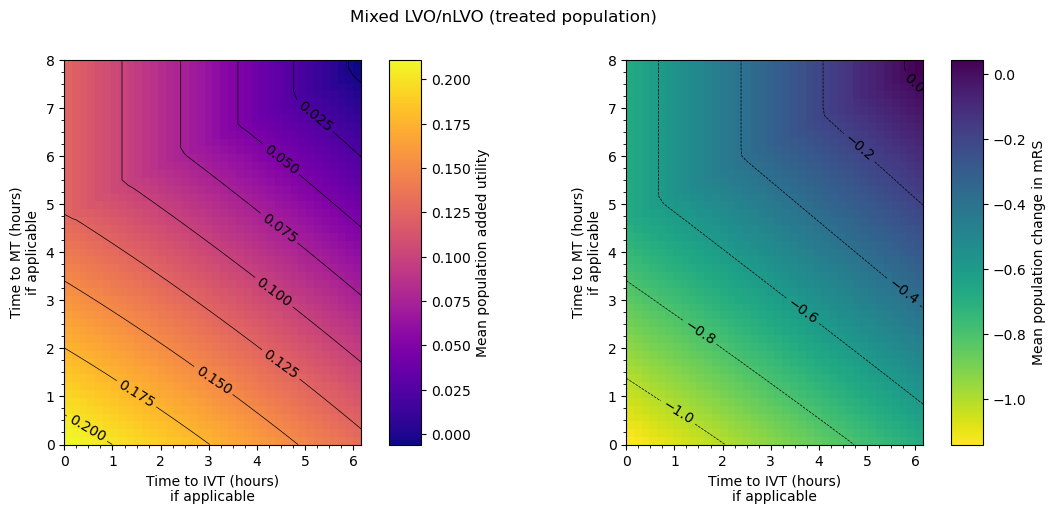

In [35]:
# Make an extra empty subplot in the middle for spacing:
fig, axs = plt.subplots(
    1, 5, figsize=(12, 5),
    gridspec_kw={'width_ratios': [10, 1, 5, 10, 1], 'wspace': 0.1}
)

for i, outcome_label in enumerate(outcome_labels.keys()):
    # Pick out which axes to plot the grid and the colour bar on:
    ax = axs[3*i]
    cax = axs[3*i +1]

    # Pick out the data for the grid.
    df = df_mixed[outcome_label]
    # Turn the column of data into a grid:
    outcome_data = df.values.reshape(len(time_to_mt), len(time_to_ivt))

    img1 = ax.contour(
        outcome_data,
        colors='k',
        linewidths=0.5,
        extent=grid_extent,
        levels=levels[outcome_label]
    )

    ax.clabel(img1, inline=True, fontsize=10)

    # Plotting:
    c = ax.imshow(
        outcome_data, origin='lower', extent=grid_extent, cmap=cmaps[i],
    )
    plt.colorbar(c, cax=cax, label=outcome_labels[outcome_label])

for ax in axs[[0, 3]]:
    ax.set_xlabel('Time to IVT (hours)\nif applicable')
    ax.set_ylabel('Time to MT (hours)\nif applicable')
    ax.xaxis.set_major_locator(ticker.MultipleLocator(major_step))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(minor_step))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(major_step))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(minor_step))

fig.suptitle('Mixed LVO/nLVO (treated population)')
# Make the extra empty subplot invisible:
axs[2].axis('off')

plt.savefig(f'./images/matrix_utility_and_mRS.jpg',
            dpi=300, bbox_inches='tight')
plt.show()

Data ranges:

In [33]:
cols = ['added_utility', 'mrs_shift']

df_ranges = pd.DataFrame(
    np.array([[df_mixed[c].min(), df_mixed[c].max()] for c in cols]).T,
    columns=cols,
    index=['Minimum', 'Maximum']
)

df_ranges

,added_utility,mrs_shift
Minimum,-0.005896,-1.14168
Maximum,0.211193,0.04515
